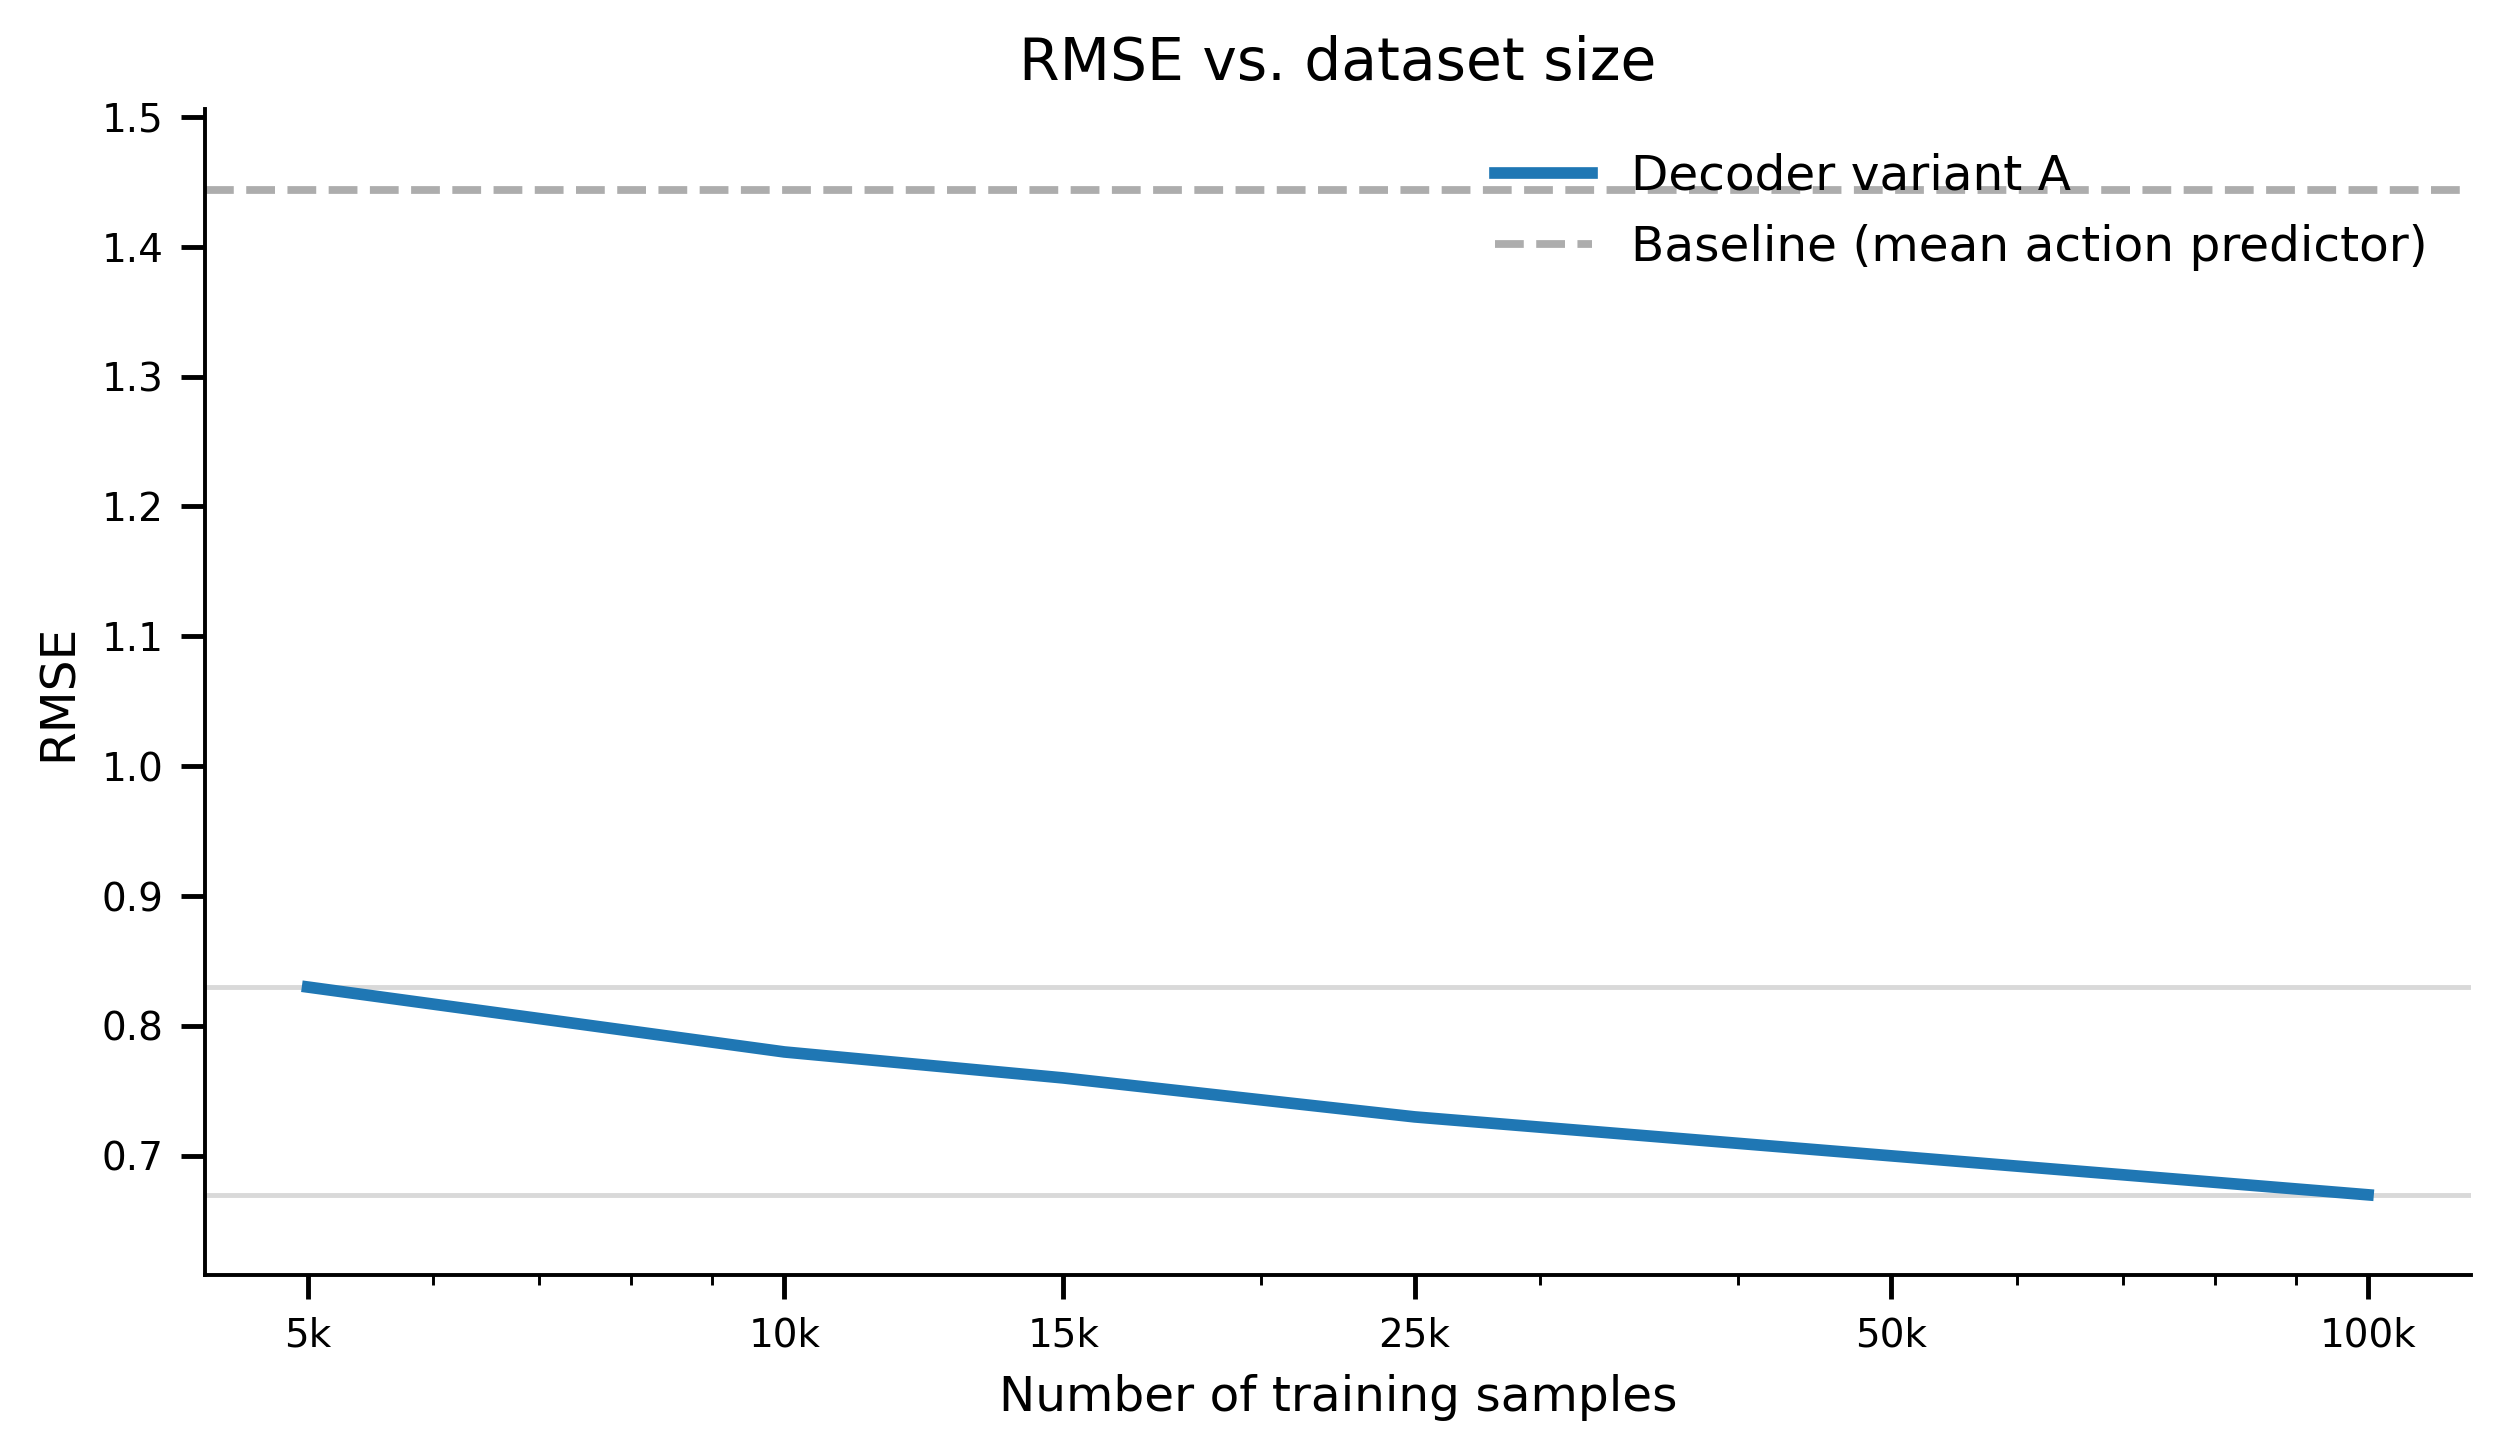

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Data
# -----------------------
dataset_sizes = np.array([5_000, 10_000, 15_000, 25_000, 50_000, 100_000])

rmse_variant_a = np.array([0.83, 0.78, 0.76, 0.73, 0.70, 0.67])
rmse_variant_b = np.array([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
rmse_variant_c = np.array([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])

baseline_low_bound = 1.444

series = [
    ("Decoder variant A", rmse_variant_a),
    ("Decoder variant B", rmse_variant_b),
    ("Decoder variant C", rmse_variant_c),
]

# -----------------------
# Style
# -----------------------
plt.rcParams.update({
    "figure.dpi": 350,
    "savefig.dpi": 350,
    "font.size": 8,
    "axes.labelsize": 10,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
})

fig, ax = plt.subplots(figsize=(7.2, 4.2))

# Model curves
for name, y in series:
    if np.any(np.isfinite(y)):
        ax.plot(
            dataset_sizes,
            y,
            linewidth=2.4,
            label=name,
        )

# Baseline (subtle)
ax.axhline(
    baseline_low_bound,
    linestyle="--",
    linewidth=1.6,
    color="0.6",   # neutral grey
    alpha=0.8,
    label="Baseline (mean action predictor)",
)
# Horizontal grid-style reference lines for start/end RMSE
y_start = rmse_variant_a[0]
y_end = rmse_variant_a[-1]

for y in [y_start, y_end]:
    ax.axhline(
        y=y,
        linestyle="-",
        linewidth=1.0,
        color="0.85",   # light grey like grid
        alpha=1.0,
        zorder=0,       # keep behind curves
    )




# Axes formatting
ax.set_xscale("log")
ax.set_xticks(dataset_sizes)
ax.set_xticklabels([f"{int(s/1000)}k" for s in dataset_sizes])

ax.set_xlabel("Number of training samples")
ax.set_ylabel("RMSE")
ax.set_title("RMSE vs. dataset size")

# Modern axis styling
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis="both", which="major", length=5, width=1)
ax.margins(y=0.08)

# Legend (no box, inside)
ax.legend(
    frameon=False,
    loc="upper right",
)

fig.tight_layout()
plt.show()
